This notebook is used as a starting point for the running the circuits required to replicate https://journals.aps.org/prc/pdf/10.1103/PhysRevC.104.024305 on AWS Braket.
<br><br>
More specifically here we are trying to duplicate the state preparation (set FIG. 1 and EQN 9).

In [52]:
# AWS imports: Import Braket SDK modules
from braket.circuits import Circuit, circuit
from braket.devices import LocalSimulator

# Other required imports
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# Check AWS Braket SDK version
!pip show amazon-braket-sdk

Name: amazon-braket-sdk
Version: 1.19.1.dev0
Summary: An open source library for interacting with quantum computing devices on Amazon Braket
Home-page: https://github.com/aws/amazon-braket-sdk-python
Author: Amazon Web Services
Author-email: 
License: Apache License 2.0
Location: /home/ec2-user/anaconda3/envs/Braket/lib/python3.7/site-packages
Requires: boltons, coverage, amazon-braket-default-simulator, numpy, boto3, networkx, nest-asyncio, sympy, backoff
Required-by: amazon-braket-pennylane-plugin, amazon-braket-ocean-plugin


In [30]:
def statePrep2Qubit(theta):
    
    phi = theta - math.pi/2
    
    num_qubits = 2
    qubits=range(num_qubits)
    
    prepCirc = Circuit()
    prepCirc.ry(0, 2*phi)
    prepCirc.cnot(0,1)
    
    return prepCirc

In [69]:
def statePrep3Qubit(theta):
    
    alpha = 2*np.arccos(-math.sqrt(2/3)*np.sin(theta))
    beta = -(math.pi/4) - np.arctan(np.tan(theta)/math.sqrt(3))
    print(f"alpha: {alpha}")
    print(f"beta: {beta}")
    num_qubits = 3
    qubits=range(num_qubits)
    
    prepCirc = Circuit()
    prepCirc.ry(0, alpha)
    prepCirc.ry(1, math.pi/2 - beta)
    prepCirc.ry(2, math.pi)
    prepCirc.cnot(0,1)
    prepCirc.ry(1, beta)
    prepCirc.cnot(1,2)
    prepCirc.cnot(0,1)
    
    return prepCirc

In [71]:
prepCirc = statePrep3Qubit(0.5)

alpha: 3.946004782704522
beta: -1.0909300147640708


In [72]:
print(prepCirc)

T  : |   0    |1|    2    |3|4|
                               
q0 : -Ry(3.95)-C-------------C-
               |             | 
q1 : -Ry(2.66)-X-Ry(-1.09)-C-X-
                           |   
q2 : -Ry(3.14)-------------X---

T  : |   0    |1|    2    |3|4|


In [73]:
theta = 0.3
prepCirc = statePrep2Qubit(theta)
# Specify the desired simulation characteristics
prepCirc.state_vector()
prepCirc.probability()
device = LocalSimulator()
task = device.run(prepCirc, shots=0)
result = task.result()
state_vector = result.values[0]
probs_values = result.values[1]
print("State Vector:")
print(state_vector)
print("State Probabilities:")
print(probs_values)

State Vector:
[ 0.29552021+0.j  0.        +0.j  0.        +0.j -0.95533649+0.j]
State Probabilities:
[0.08733219 0.         0.         0.91266781]


Theta: 0.3
Exact statevector:
 [(0.296+0j), 0, 0, (-0.955+0j)]


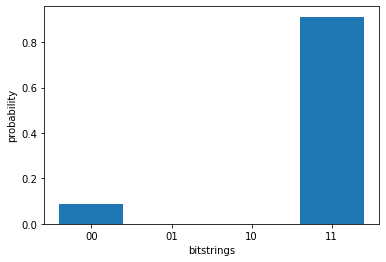

In [74]:
# format statevector for output
state_vec_pretty = np.round(state_vector, decimals=3)
state_vec_pretty = [ampl if np.abs(ampl)>10**(-5) else 0 for ampl in state_vec_pretty]

# bitstrings
format_bitstring = '{0:0' + str(2) + 'b}'
bitstring_keys = [format_bitstring.format(ii) for ii in range(2**2)]

# Print the output state vector
print(f'Theta: {theta}')
print('Exact statevector:\n', state_vec_pretty)

# plot probabalities
plt.bar(bitstring_keys, probs_values);
plt.xlabel('bitstrings');
plt.ylabel('probability');

In [75]:
theta = 0.3
prepCirc = statePrep3Qubit(theta)
# Specify the desired simulation characteristics
prepCirc.state_vector()
prepCirc.probability()
device = LocalSimulator()
task = device.run(prepCirc, shots=0)
result = task.result()
state_vector = result.values[0]
probs_values = result.values[1]
print("State Vector:")
print(state_vector)
print("State Probabilities:")
print(probs_values)

alpha: 3.6289850214222397
beta: -0.9621302180290598
State Vector:
[-1.04473805e-17+0.j -1.70618671e-01+0.j -1.70618671e-01+0.j
 -1.04473805e-17+0.j -1.70618671e-01+0.j -1.04473805e-17+0.j
  5.84974887e-17+0.j  9.55336489e-01+0.j]
State Probabilities:
[1.09147758e-34 2.91107308e-02 2.91107308e-02 1.09147758e-34
 2.91107308e-02 1.09147758e-34 3.42195618e-33 9.12667807e-01]


Theta: 0.3
Exact statevector:
 [0, (-0.171+0j), (-0.171+0j), 0, (-0.171+0j), 0, 0, (0.955+0j)]


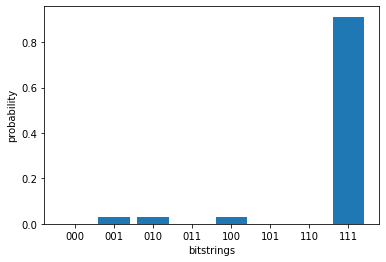

In [76]:
# format statevector for output
state_vec_pretty = np.round(state_vector, decimals=3)
state_vec_pretty = [ampl if np.abs(ampl)>10**(-5) else 0 for ampl in state_vec_pretty]

# bitstrings
format_bitstring = '{0:0' + str(3) + 'b}'
bitstring_keys = [format_bitstring.format(ii) for ii in range(2**3)]

# Print the output state vector
print(f'Theta: {theta}')
print('Exact statevector:\n', state_vec_pretty)

# plot probabalities
plt.bar(bitstring_keys, probs_values);
plt.xlabel('bitstrings');
plt.ylabel('probability');